In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import prep_plays
import wrangle_plays_data
import acquire_plays_data
import prep_season
plt.rcParams['figure.figsize']=(13,7)


plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
week1 = pd.read_csv('week1.csv')
week2 = pd.read_csv('week2.csv')
week3 = pd.read_csv('week3.csv')
week4 = pd.read_csv('week4.csv')
week5 = pd.read_csv('week5.csv')
week6 = pd.read_csv('week6.csv')
week7 = pd.read_csv('week7.csv')
week8 = pd.read_csv('week8.csv')
week9 = pd.read_csv('week9.csv')
week10 = pd.read_csv('week10.csv')
week11 = pd.read_csv('week11.csv')
week12 = pd.read_csv('week12.csv')
week13 = pd.read_csv('week13.csv')
week14 = pd.read_csv('week14.csv')
week15 = pd.read_csv('week15.csv')
week16 = pd.read_csv('week16.csv')
week17 = pd.read_csv('week17.csv')
#plays = pd.read_csv('plays.csv')
#plays = pd.read_csv('plays.csv')

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
week1.event.value_counts()

None                         908315
ball_snap                     15236
pass_forward                  14166
pass_arrived                  11456
pass_outcome_caught            8179
first_contact                  6866
tackle                         6792
pass_outcome_incomplete        5305
play_action                    2586
out_of_bounds                  1728
line_set                       1489
qb_sack                         788
man_in_motion                   547
pass_outcome_interception       485
touchdown                       366
pass_tipped                     280
fumble                          236
pass_outcome_touchdown          214
qb_strip_sack                   178
fumble_defense_recovered        176
fumble_offense_recovered        149
shift                           132
handoff                         101
penalty_flag                     61
pass_shovel                      60
run                              42
touchback                        30
qb_spike                    

In [3]:

def prep_week(df):

    df = df.dropna(axis = 0, how ='any')
    df.drop(df.index[df['event'] == 'None'], inplace = True)
    df.drop(df.index[df['event'] == 'ball_snap'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_forward'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_arrived'], inplace = True)
    df.drop(df.index[df['event'] == 'tackle'], inplace = True)
    df.drop(df.index[df['event'] == 'first_contact'], inplace = True)
    df.drop(df.index[df['event'] == 'play_action'], inplace = True)
    df.drop(df.index[df['event'] == 'out_of_bounds'], inplace = True)
    df.drop(df.index[df['event'] == 'line_set'], inplace = True)
    df.drop(df.index[df['event'] == 'man_in_motion'], inplace = True)
    df.drop(df.index[df['event'] == 'touchdown'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_tipped'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_outcome_touchdown'], inplace = True)
    df.drop(df.index[df['event'] == 'fumble'], inplace = True)
    df.drop(df.index[df['event'] == 'shift'], inplace = True)
    df.drop(df.index[df['event'] == 'fumble_defense_recovered'], inplace = True)
    df.drop(df.index[df['event'] == 'handoff'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_shovel'], inplace = True)
    df.drop(df.index[df['event'] == 'penalty_flag'], inplace = True)
    df.drop(df.index[df['event'] == 'fumble_offense_recovered'], inplace = True)
    df.drop(df.index[df['event'] == 'touchback'], inplace = True)
    df.drop(df.index[df['event'] == 'penalty_accepted'], inplace = True)
    df.drop(df.index[df['event'] == 'field_goal_blocked'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_lateral'], inplace = True)
    df.drop(df.index[df['event'] == 'lateral'], inplace = True)
    df.drop(df.index[df['event'] == 'snap_direct'], inplace = True)
    df.drop(df.index[df['event'] == 'run_pass_option'], inplace = True)
    df.drop(df.index[df['event'] == 'huddle_break_offense'], inplace = True)
    df.drop(df.index[df['event'] == 'huddle_start_offense'], inplace = True)
    df.drop(df.index[df['event'] == 'qb_strip_sack'], inplace = True)
    df.drop(df.index[df['event'] == 'timeout_home'], inplace = True)
    df.drop(df.index[df['event'] == 'qb_sack'], inplace = True)
    df['event'].replace({'pass_outcome_caught': 0,'pass_outcome_incomplete' : 1,'pass_outcome_interception' : 1}, inplace=True)
    #df['event'] = pd.to_numeric(df['event'])
    return df

In [4]:
week2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231793 entries, 0 to 1231792
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   time           1231793 non-null  object 
 1   x              1231793 non-null  float64
 2   y              1231793 non-null  float64
 3   s              1231793 non-null  float64
 4   a              1231766 non-null  float64
 5   dis            1231793 non-null  float64
 6   o              1147811 non-null  float64
 7   dir            1147811 non-null  float64
 8   event          1231793 non-null  object 
 9   nflId          1147811 non-null  float64
 10  displayName    1231793 non-null  object 
 11  jerseyNumber   1147811 non-null  float64
 12  position       1147811 non-null  object 
 13  frameId        1231793 non-null  int64  
 14  team           1231793 non-null  object 
 15  gameId         1231793 non-null  int64  
 16  playId         1231793 non-null  int64  
 17  playDire

In [5]:
week2.event.value_counts()

None                         1135827
ball_snap                      19020
pass_forward                   17545
pass_arrived                   15079
pass_outcome_caught            11461
tackle                          9018
first_contact                   6240
pass_outcome_incomplete         5249
play_action                     3356
out_of_bounds                   2528
line_set                        1201
qb_sack                         1008
man_in_motion                    581
touchdown                        522
shift                            511
pass_outcome_touchdown           497
pass_tipped                      385
pass_outcome_interception        363
fumble                           306
qb_strip_sack                    203
fumble_defense_recovered         172
qb_spike                         149
fumble_offense_recovered         145
handoff                          130
pass_shovel                      102
pass_lateral                      60
touchback                         30
r

In [6]:
#week2['event'] = pd.to_numeric(week2['event'])

#week2['event'] = week2.event.astype('int',errors='ignore')

In [7]:
week2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231793 entries, 0 to 1231792
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   time           1231793 non-null  object 
 1   x              1231793 non-null  float64
 2   y              1231793 non-null  float64
 3   s              1231793 non-null  float64
 4   a              1231766 non-null  float64
 5   dis            1231793 non-null  float64
 6   o              1147811 non-null  float64
 7   dir            1147811 non-null  float64
 8   event          1231793 non-null  object 
 9   nflId          1147811 non-null  float64
 10  displayName    1231793 non-null  object 
 11  jerseyNumber   1147811 non-null  float64
 12  position       1147811 non-null  object 
 13  frameId        1231793 non-null  int64  
 14  team           1231793 non-null  object 
 15  gameId         1231793 non-null  int64  
 16  playId         1231793 non-null  int64  
 17  playDire

In [8]:
week1 = prep_week(week1)
week2 = prep_week(week2)
week3 = prep_week(week3)
week4 = prep_week(week4)
week5 = prep_week(week5)
week6 = prep_week(week6)
week7 = prep_week(week7)
week8 = prep_week(week8)
week9 = prep_week(week9)
week10 = prep_week(week10)
week11 = prep_week(week11)
week12 = prep_week(week12)
week13 = prep_week(week13)
week14 = prep_week(week14)
week15 = prep_week(week15)
week16 = prep_week(week16)
week17 = prep_week(week17)

In [9]:
dfs = [week1,week2,week3,week4,week5,week6,week7,
      week8,week9,week10,week11,week12,week13,
      week14,week15,week16,week17]
weekdf = pd.concat(dfs)

In [10]:
weekdf.head(20)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
716,2018-09-07T01:07:19.700Z,81.48,50.13,4.93,3.07,0.49,326.77,358.86,0,2495454.0,Julio Jones,11.0,WR,52,away,2018090600,75,left,HITCH
718,2018-09-07T01:07:19.700Z,76.75,36.60,2.82,1.85,0.28,33.31,332.72,0,2533040.0,Mohamed Sanu,12.0,WR,52,away,2018090600,75,left,HITCH
724,2018-09-07T01:07:19.700Z,77.70,13.31,6.73,2.22,0.68,137.26,186.71,0,2555415.0,Austin Hooper,81.0,TE,52,away,2018090600,75,left,OUT
726,2018-09-07T01:07:19.700Z,86.28,8.01,5.34,3.77,0.55,71.65,202.39,0,2559033.0,Ricky Ortiz,30.0,FB,52,away,2018090600,75,left,FLAT
1487,2018-09-07T01:09:14.400Z,55.02,23.19,1.01,1.97,0.10,285.93,281.05,1,2543583.0,Devonta Freeman,24.0,RB,48,away,2018090600,146,left,FLAT
1489,2018-09-07T01:09:14.400Z,43.25,34.36,5.31,1.96,0.52,96.49,1.37,1,2552418.0,Justin Hardy,14.0,WR,48,away,2018090600,146,left,CROSS
1492,2018-09-07T01:09:14.400Z,43.62,49.96,1.18,4.92,0.14,200.32,328.01,1,2555415.0,Austin Hooper,81.0,TE,48,away,2018090600,146,left,FLAT
1494,2018-09-07T01:09:14.400Z,39.47,10.82,2.70,1.29,0.27,338.68,347.02,1,2557034.0,Marvin Hall,17.0,WR,48,away,2018090600,146,left,HITCH
1496,2018-09-07T01:09:14.400Z,47.25,37.10,1.93,2.46,0.16,160.91,94.14,1,2560854.0,Calvin Ridley,18.0,WR,48,away,2018090600,146,left,HITCH
2158,2018-09-07T01:09:55.200Z,40.89,40.88,3.60,1.18,0.36,235.78,213.57,1,2495454.0,Julio Jones,11.0,WR,47,away,2018090600,168,left,GO


# <div class="alert alert-block alert-info"> Week 1 info </div>

In [11]:
week1.info()#route.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 716 to 985674
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           4148 non-null   object 
 1   x              4148 non-null   float64
 2   y              4148 non-null   float64
 3   s              4148 non-null   float64
 4   a              4148 non-null   float64
 5   dis            4148 non-null   float64
 6   o              4148 non-null   float64
 7   dir            4148 non-null   float64
 8   event          4148 non-null   int64  
 9   nflId          4148 non-null   float64
 10  displayName    4148 non-null   object 
 11  jerseyNumber   4148 non-null   float64
 12  position       4148 non-null   object 
 13  frameId        4148 non-null   int64  
 14  team           4148 non-null   object 
 15  gameId         4148 non-null   int64  
 16  playId         4148 non-null   int64  
 17  playDirection  4148 non-null   object 
 18  rout

### Which route has the most incompletions?

,route,event
0,ANGLE,61
1,CORNER,55
2,CROSS,158
3,FLAT,196
4,GO,339
5,HITCH,241
6,IN,118
7,OUT,159
8,POST,122
9,SCREEN,47


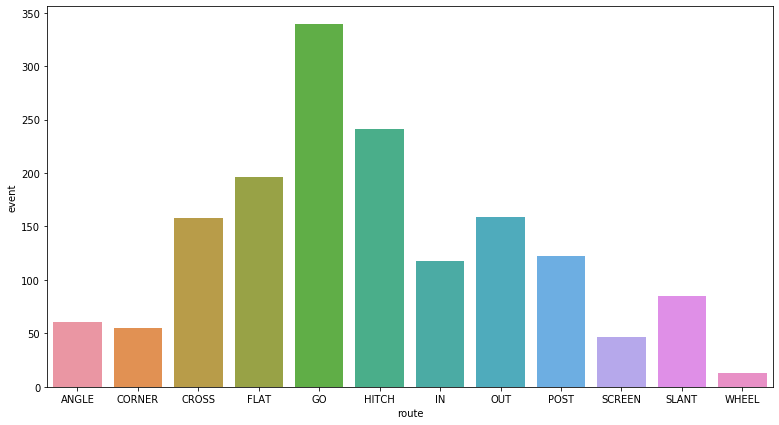

In [12]:
routead = week1.groupby('route')['event'].sum().reset_index()

sns.barplot(data=routead, x='route', y= 'event')

routead

### Listed positions and incompletions

,position,event
0,DL,0
1,FB,8
2,HB,6
3,RB,265
4,TE,362
5,WR,953


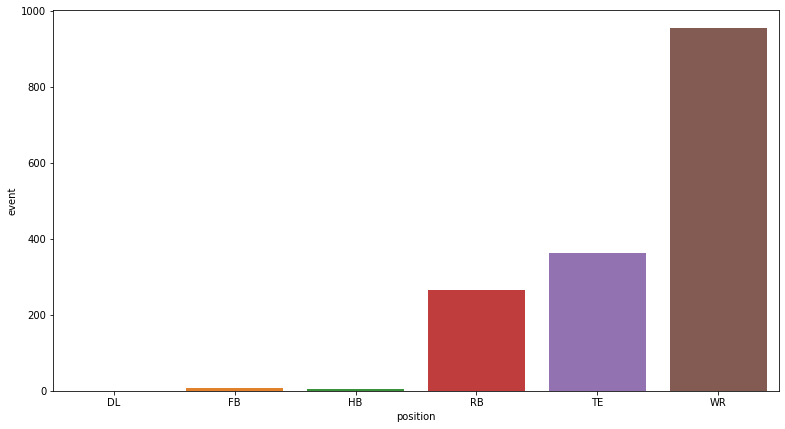

In [13]:
# DL was patrick ricard

positionad = week1.groupby('position')['event'].sum().reset_index()

sns.barplot(data=positionad, x='position', y= 'event')

positionad

In [14]:
week1[week1['position'] == 'DL']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
87952,2018-09-09T17:04:55.900Z,57.92,12.69,7.36,1.96,0.74,105.06,138.24,0,2558990.0,Patrick Ricard,42.0,DL,40,home,2018090900,95,right,FLAT


### Does the home team have an advantage for completions?

,team,event
0,away,796
1,home,798


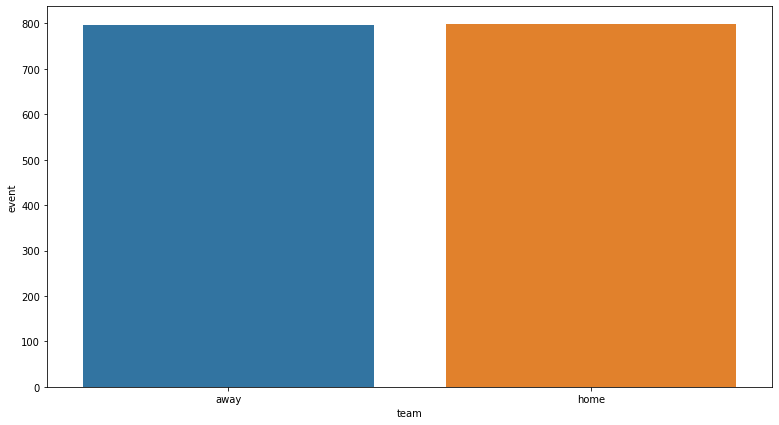

In [15]:
homead = week1.groupby('team')['event'].sum().reset_index()

sns.barplot(data=homead, x='team', y= 'event')

homead

### Top 20 player incompletions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

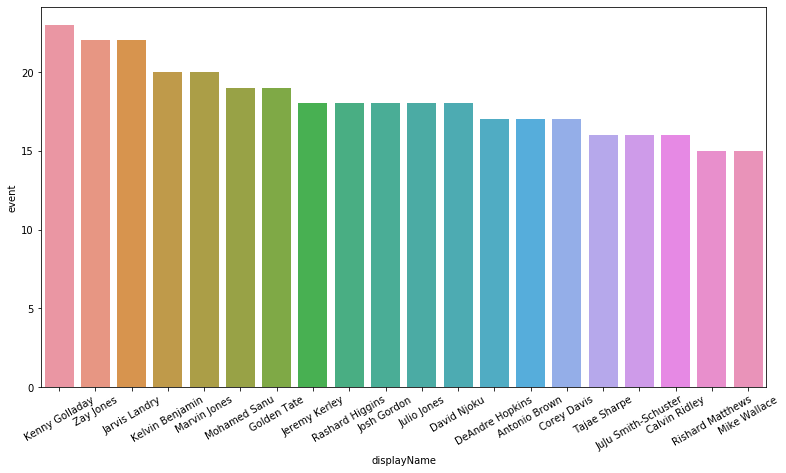

In [16]:
namead = week1.groupby('displayName')['event'].sum().reset_index()

namead20 = namead.sort_values(by='event', ascending=False).head(20)

sns.barplot(data=namead20, x='displayName', y= 'event')
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

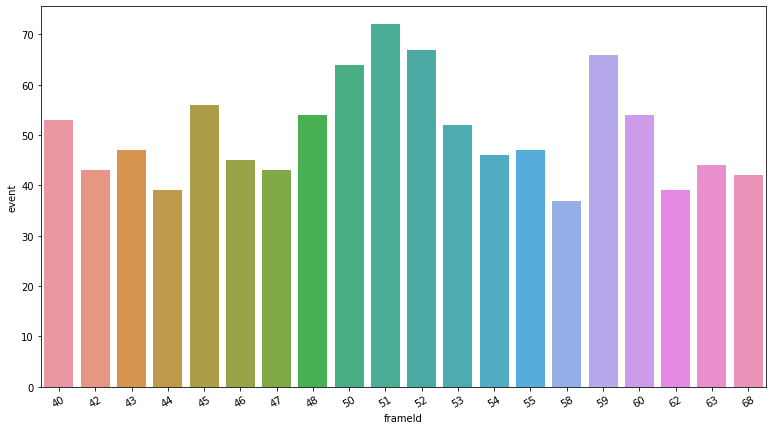

In [32]:
frame1 = week1.groupby('frameId')['event'].sum().reset_index()
#frame1 = frame1.sort_values(by=['event'], ascending = False)
frame120 = frame1.sort_values(by='event', ascending=False).head(20)

sns.barplot(data=frame120, x='frameId', y= 'event')
plt.xticks(rotation=30)

In [30]:
frame1

frameId
25      0
26      0
27      0
28      0
29      0
       ..
99      0
104     4
106    10
115     5
138     5
Name: event, Length: 74, dtype: int64

# <div class="alert alert-block alert-info"> Weeks 1-17 info </div>

In [19]:
weekdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76351 entries, 716 to 1048577
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           76351 non-null  object 
 1   x              76351 non-null  float64
 2   y              76351 non-null  float64
 3   s              76351 non-null  float64
 4   a              76351 non-null  float64
 5   dis            76351 non-null  float64
 6   o              76351 non-null  float64
 7   dir            76351 non-null  float64
 8   event          76351 non-null  int64  
 9   nflId          76351 non-null  float64
 10  displayName    76351 non-null  object 
 11  jerseyNumber   76351 non-null  float64
 12  position       76351 non-null  object 
 13  frameId        76351 non-null  int64  
 14  team           76351 non-null  object 
 15  gameId         76351 non-null  int64  
 16  playId         76351 non-null  int64  
 17  playDirection  76351 non-null  object 
 18  ro

In [20]:
weekdf.event.value_counts()

0    49329
1    27022
Name: event, dtype: int64

### Week 1-17 Route Incompletions


,route,event
0,ANGLE,996
1,CORNER,1088
2,CROSS,2730
3,FLAT,3638
4,GO,5136
5,HITCH,4133
6,IN,2202
7,OUT,2915
8,POST,2034
9,SCREEN,690


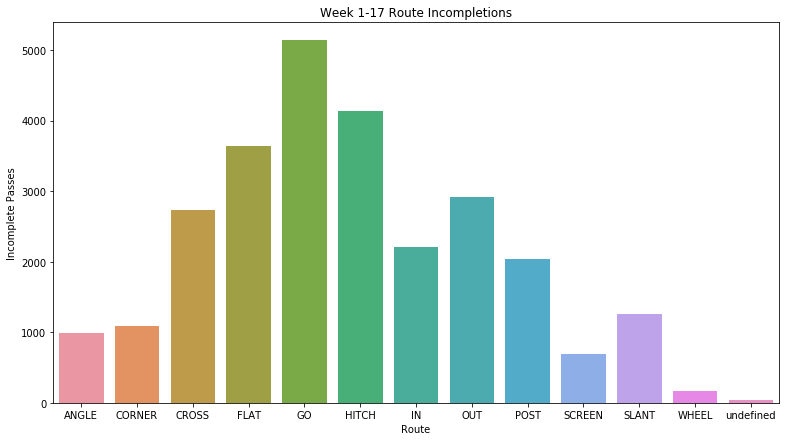

In [21]:
routedf = weekdf.groupby('route')['event'].sum().reset_index()

sns.barplot(data=routedf, x='route', y= 'event')
plt.title('Week 1-17 Route Incompletions')
plt.xlabel('Route')
plt.ylabel('Incomplete Passes')

routedf

### Week 1-17 Listed positions and incompletions

,position,event
0,CB,3
1,DE,1
2,DL,2
3,DT,0
4,FB,150
5,FS,1
6,HB,172
7,QB,21
8,RB,4483
9,TE,5838


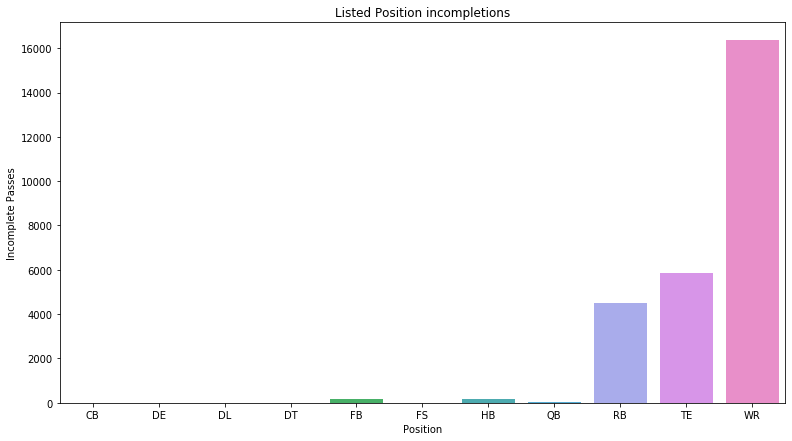

In [22]:
positiondf = weekdf.groupby('position')['event'].sum().reset_index()

sns.barplot(data=positiondf, x='position', y= 'event')
plt.title('Listed Position incompletions')
plt.xlabel('Position')
plt.ylabel('Incomplete Passes')

positiondf

### Does the home team have less incompletions?

,team,event
0,away,13595
1,home,13427


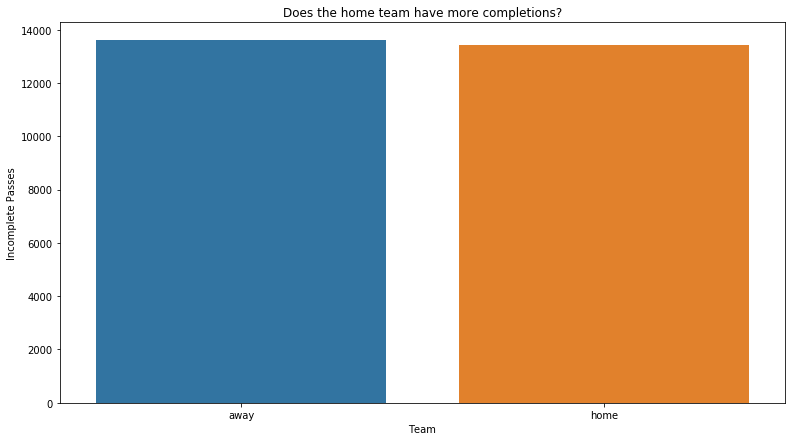

In [23]:
homedf = weekdf.groupby('team')['event'].sum().reset_index()

sns.barplot(data=homedf, x='team', y= 'event')
plt.title('Does the home team have more completions?')
plt.xlabel('Team')
plt.ylabel('Incomplete Passes')

homedf

### Top 20 player incompletions

Text(0, 0.5, 'Incomplete Passes')

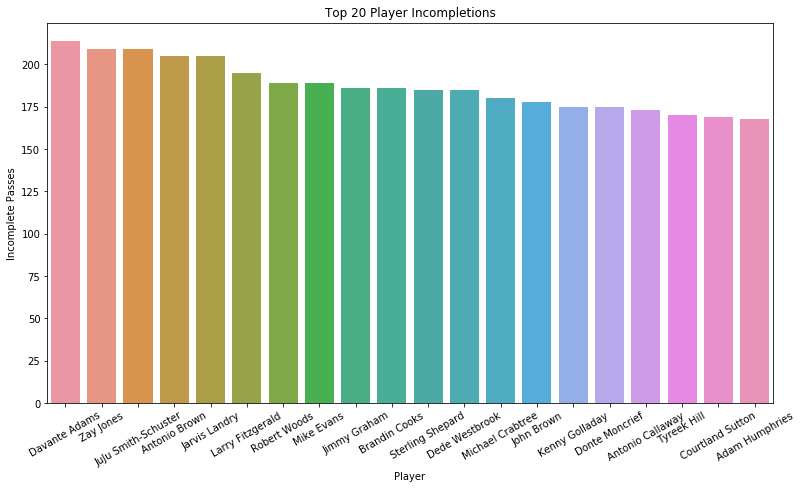

In [24]:
namedf = weekdf.groupby('displayName')['event'].sum().reset_index()

name20 = namedf.sort_values(by='event', ascending=False).head(20)

sns.barplot(data=name20, x='displayName', y= 'event')
plt.xticks(rotation=30)
plt.title('Top 20 Player Incompletions')
plt.xlabel('Player')
plt.ylabel('Incomplete Passes')

# <div class="alert alert-block alert-info">  Prepped Season DF </div>

In [3]:
df = prep_season.prep_season()
df

,time,x,y,s,a,dis,o,dir,event,nflId,...,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age
51,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.0,...,2018090600,75,left,NaN,1,76,217,1985-05-17,Boston College,33.0
106,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.0,...,2018090600,146,left,NaN,1,76,217,1985-05-17,Boston College,33.0
154,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.0,...,2018090600,168,left,NaN,1,76,217,1985-05-17,Boston College,33.0
217,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.0,...,2018090600,190,left,NaN,1,76,217,1985-05-17,Boston College,33.0
274,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.0,...,2018090600,256,left,NaN,1,76,217,1985-05-17,Boston College,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097015,2018-12-31T00:02:23.599Z,70.69,19.51,2.69,2.42,0.27,197.62,163.56,0,2552576.0,...,2018123014,3534,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
17097101,2018-12-31T00:04:43.799Z,55.71,31.13,1.32,1.32,0.14,25.40,74.26,1,2552576.0,...,2018123014,3603,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
17097154,2018-12-31T00:27:31.400Z,77.27,40.95,3.45,3.72,0.35,340.24,359.55,0,2552576.0,...,2018123014,4088,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
17097212,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,2561469.0,...,2018123014,4181,right,NaN,17,69,187,1993-03-15,Alabama-Birmingham,25.0


In [4]:
pd.set_option('display.max_columns',None)
df

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age
51,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.0,Matt Ryan,2.0,QB,52,away,2018090600,75,left,NaN,1,76,217,1985-05-17,Boston College,33.0
106,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.0,Matt Ryan,2.0,QB,48,away,2018090600,146,left,NaN,1,76,217,1985-05-17,Boston College,33.0
154,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.0,Matt Ryan,2.0,QB,47,away,2018090600,168,left,NaN,1,76,217,1985-05-17,Boston College,33.0
217,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.0,Matt Ryan,2.0,QB,62,away,2018090600,190,left,NaN,1,76,217,1985-05-17,Boston College,33.0
274,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.0,Matt Ryan,2.0,QB,46,away,2018090600,256,left,NaN,1,76,217,1985-05-17,Boston College,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097015,2018-12-31T00:02:23.599Z,70.69,19.51,2.69,2.42,0.27,197.62,163.56,0,2552576.0,Sean Mannion,14.0,QB,47,home,2018123014,3534,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
17097101,2018-12-31T00:04:43.799Z,55.71,31.13,1.32,1.32,0.14,25.40,74.26,1,2552576.0,Sean Mannion,14.0,QB,47,home,2018123014,3603,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
17097154,2018-12-31T00:27:31.400Z,77.27,40.95,3.45,3.72,0.35,340.24,359.55,0,2552576.0,Sean Mannion,14.0,QB,52,home,2018123014,4088,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
17097212,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,2561469.0,Darious Williams,31.0,CB,42,home,2018123014,4181,right,NaN,17,69,187,1993-03-15,Alabama-Birmingham,25.0


In [5]:
df.event.value_counts()

0    149526
1     88893
Name: event, dtype: int64

In [13]:
df.position.value_counts()

CB     48123
WR     47497
OLB    21087
TE     20445
FS     18438
QB     17428
RB     17330
SS     14395
ILB    12342
LB      7184
MLB     5881
DB      5123
S       1728
HB       595
FB       581
DE       143
DL        35
DT        28
LS        14
P         13
NT         6
K          3
Name: position, dtype: int64

In [30]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [29]:
df[df['position'] == 'CB']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age
224857,2018-09-07T01:07:19.700Z,76.54,14.86,4.91,1.36,0.49,249.15,195.28,0,2552689.0,Ronald Darby,21.0,CB,52,home,2018090600,75,left,NaN,1,71,193,1994-01-02,Florida State,24.0
224912,2018-09-07T01:09:14.400Z,38.41,8.61,0.92,2.75,0.08,39.47,359.97,1,2552689.0,Ronald Darby,21.0,CB,48,home,2018090600,146,left,NaN,1,71,193,1994-01-02,Florida State,24.0
224960,2018-09-07T01:09:55.200Z,37.53,11.00,2.07,2.67,0.19,105.80,118.02,1,2552689.0,Ronald Darby,21.0,CB,47,home,2018090600,168,left,NaN,1,71,193,1994-01-02,Florida State,24.0
225023,2018-09-07T01:10:40.700Z,23.35,8.82,8.03,5.13,0.81,249.35,256.19,0,2552689.0,Ronald Darby,21.0,CB,62,home,2018090600,190,left,NaN,1,71,193,1994-01-02,Florida State,24.0
225098,2018-09-07T01:21:51.799Z,38.39,11.32,6.49,1.03,0.65,120.06,107.24,1,2552689.0,Ronald Darby,21.0,CB,64,home,2018090600,402,left,NaN,1,71,193,1994-01-02,Florida State,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17090025,2018-12-30T19:17:35.700Z,37.56,12.80,2.93,0.96,0.30,56.18,33.29,1,2558819.0,Derrick Jones,31.0,CB,45,away,2018123006,1805,left,NaN,17,74,188,1994-12-04,Mississippi,23.0
17090093,2018-12-30T19:43:55.700Z,48.44,45.05,2.32,1.52,0.24,113.48,114.46,1,2558819.0,Derrick Jones,31.0,CB,67,away,2018123006,2135,right,NaN,17,74,188,1994-12-04,Mississippi,23.0
17090144,2018-12-30T20:27:44.400Z,28.08,4.45,5.92,1.54,0.58,350.28,133.04,0,2558819.0,Derrick Jones,31.0,CB,50,away,2018123006,3113,left,NaN,17,74,188,1994-12-04,Mississippi,23.0
17097212,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,2561469.0,Darious Williams,31.0,CB,42,home,2018123014,4181,right,NaN,17,69,187,1993-03-15,Alabama-Birmingham,25.0


In [19]:
df.weight.value_counts()

215    11623
195    10540
190    10369
205     9210
210     7975
       ...  
350        1
307        1
309        1
332        1
290        1
Name: weight, Length: 134, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238419 entries, 51 to 17097289
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   time           238419 non-null  object        
 1   x              238419 non-null  float64       
 2   y              238419 non-null  float64       
 3   s              238419 non-null  float64       
 4   a              238419 non-null  float64       
 5   dis            238419 non-null  float64       
 6   o              238385 non-null  float64       
 7   dir            238387 non-null  float64       
 8   event          238419 non-null  int64         
 9   nflId          238419 non-null  float64       
 10  displayName    238419 non-null  object        
 11  jerseyNumber   238419 non-null  float64       
 12  position       238419 non-null  object        
 13  frameId        238419 non-null  int64         
 14  team           238419 non-null  object        
 1

Text(0, 0.5, 'Incomplete Passes')

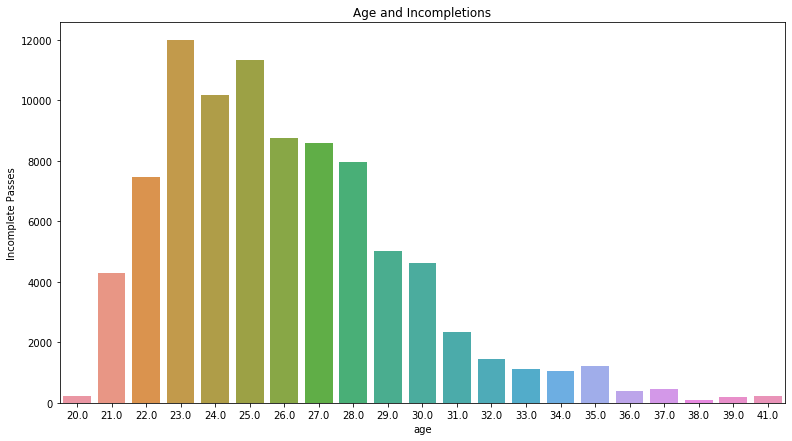

In [8]:
agedf = df.groupby('age')['event'].sum().reset_index()

sns.barplot(data=agedf, x='age', y= 'event')
plt.title('Age and Incompletions')
plt.xlabel('age')
plt.ylabel('Incomplete Passes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

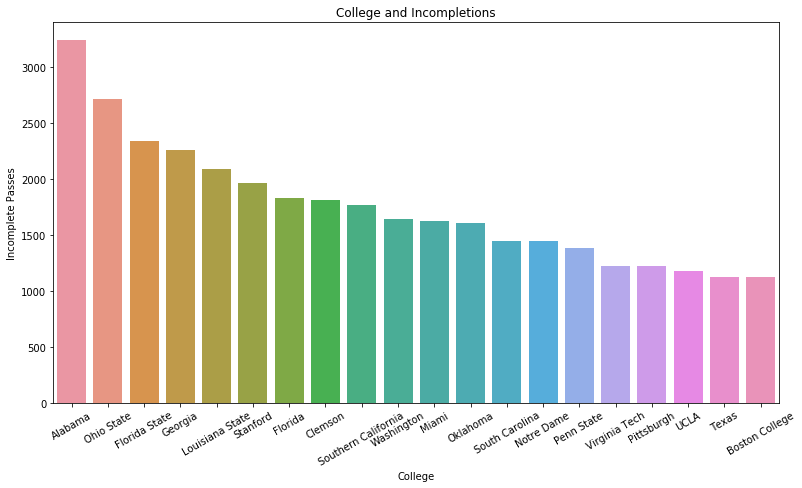

In [17]:
collegedf = df.groupby('collegeName')['event'].sum().reset_index()
college20 = collegedf.sort_values(by='event', ascending=False).head(20)

sns.barplot(data=college20, x='collegeName', y= 'event')
plt.title('College and Incompletions')
plt.xlabel('College')
plt.ylabel('Incomplete Passes')
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

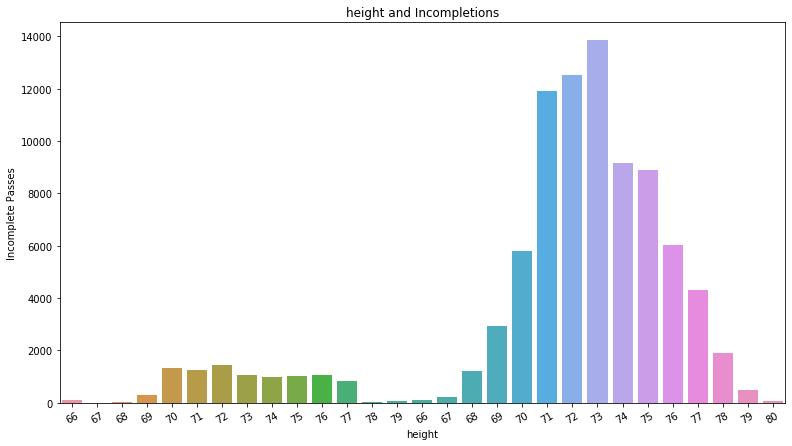

In [15]:
heightdf = df.groupby('height')['event'].sum().reset_index()

sns.barplot(data=heightdf, x='height', y= 'event')
plt.title('height and Incompletions')
plt.xlabel('height')
plt.ylabel('Incomplete Passes')
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

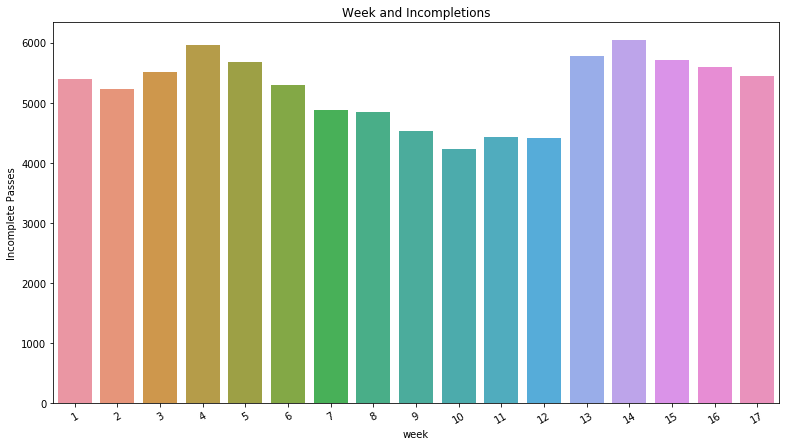

In [18]:
weekdf = df.groupby('week')['event'].sum().reset_index()

sns.barplot(data=weekdf, x='week', y= 'event')
plt.title('Week and Incompletions')
plt.xlabel('week')
plt.ylabel('Incomplete Passes')
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

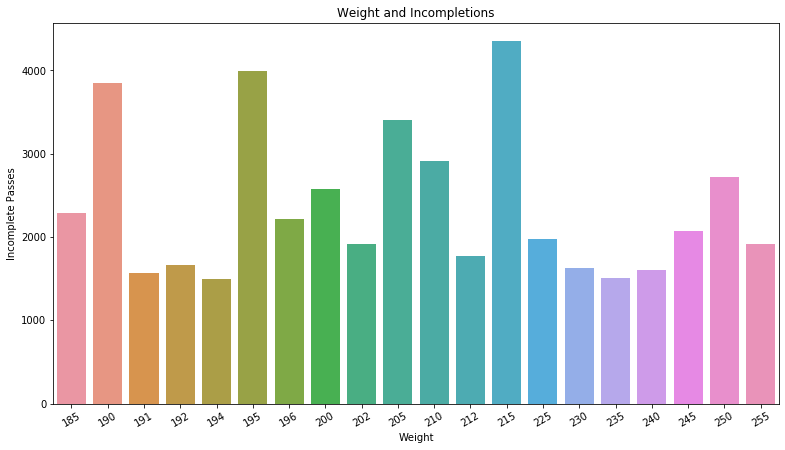

In [22]:
weightdf = df.groupby('weight')['event'].sum().reset_index()
weight20 = weightdf.sort_values(by='event', ascending=False)

sns.barplot(data=weight20, x='weight', y= 'event')
plt.title('Weight and Incompletions')
plt.xlabel('Weight')
plt.ylabel('Incomplete Passes')
plt.xticks(rotation=30)

,team,event
0,away,44364
1,home,44529


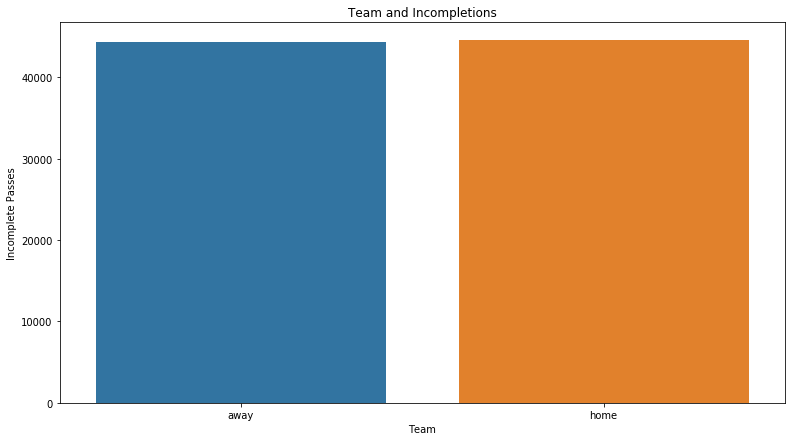

In [27]:
teamdf = df.groupby('team')['event'].sum().reset_index()


sns.barplot(data=teamdf, x='team', y= 'event')
plt.title('Team and Incompletions')
plt.xlabel('Team')
plt.ylabel('Incomplete Passes')
#plt.xticks(rotation=30)
teamdf

Text(0, 0.5, 'Incomplete Passes')

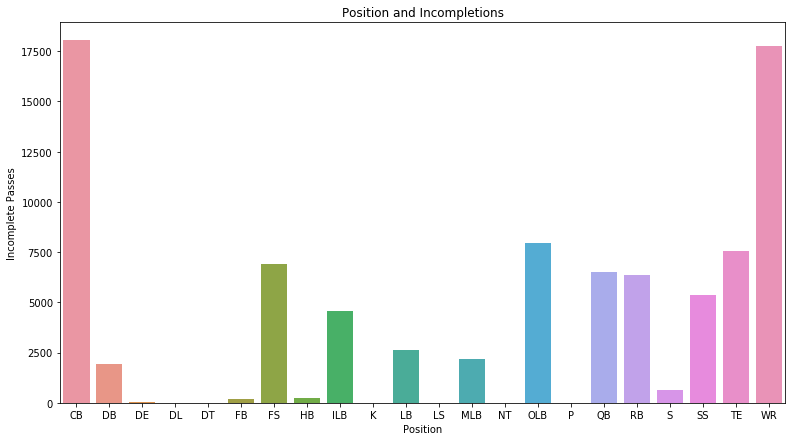

In [32]:
posdf = df.groupby('position')['event'].sum().reset_index()
#pos20 = posdf.sort_values(by='event', ascending=False)

sns.barplot(data=posdf, x='position', y= 'event')
plt.title('Position and Incompletions')
plt.xlabel('Position')
plt.ylabel('Incomplete Passes')